In [354]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [355]:
# read data
df = pd.read_csv("train.csv")
df.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [356]:
df.shape

(31599, 15)

In [357]:
df.drop(columns = ["Id"], inplace  = True)

In [358]:
# there is no duplicates in data 
df.duplicated().sum()


0

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           31599 non-null  object 
 1   Property_Area           31599 non-null  int64  
 2   Number_of_Windows       30266 non-null  float64
 3   Number_of_Doors         31599 non-null  int64  
 4   Furnishing              30771 non-null  object 
 5   Frequency_of_Powercuts  30490 non-null  float64
 6   Power_Backup            31599 non-null  object 
 7   Water_Supply            31599 non-null  object 
 8   Traffic_Density_Score   31599 non-null  float64
 9   Crime_Rate              30970 non-null  object 
 10  Dust_and_Noise          30600 non-null  object 
 11  Air_Quality_Index       31599 non-null  float64
 12  Neighborhood_Review     31599 non-null  float64
 13  Habitability_score      31599 non-null  float64
dtypes: float64(6), int64(2), object(6)
mem

In [360]:
df.isnull().sum()[df.isnull().sum()>0]/len(df)

Number_of_Windows         0.042185
Furnishing                0.026203
Frequency_of_Powercuts    0.035096
Crime_Rate                0.019906
Dust_and_Noise            0.031615
dtype: float64

In [361]:
# encode the categorical columns

In [362]:
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
cat_cols

['Property_Type',
 'Furnishing',
 'Power_Backup',
 'Water_Supply',
 'Crime_Rate',
 'Dust_and_Noise']

In [363]:
odi_encode = ["Furnishing","Crime_Rate", "Dust_and_Noise"]

In [364]:
ohe_encode = ["Property_Type", "Power_Backup","Water_Supply"]    

In [365]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Perform one-hot encoding
ohe_encoder = OneHotEncoder(drop='first')  # Drop first category to avoid multicollinearity
ohe_encoded = ohe_encoder.fit_transform(df[ohe_encode])

# Convert one-hot encoded result to DataFrame
ohe_encoded_df = pd.DataFrame(ohe_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(ohe_encode))

# Perform ordinal encoding
odi_encoder = OrdinalEncoder(categories = [['Unfurnished','Semi_Furnished','Fully Furnished'],
                                   ['Well below average','Slightly below average','Slightly above average','Well above average'],
                                  ['Low','Medium','High']], handle_unknown = 'use_encoded_value', unknown_value = -1)
odi_encoded = odi_encoder.fit_transform(df[odi_encode])
odi_encoded_df = pd.DataFrame(odi_encoded, columns=odi_encode)

# Combine encoded features with original DataFrame
encoded_df = pd.concat([df.drop(columns=ohe_encode + odi_encode), ohe_encoded_df, odi_encoded_df], axis=1)


In [366]:
encoded_df.columns

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score', 'Property_Type_Apartment',
       'Property_Type_Bungalow', 'Property_Type_Container Home',
       'Property_Type_Duplex', 'Property_Type_Single-family home',
       'Power_Backup_No', 'Power_Backup_Yes', 'Water_Supply_NOT MENTIONED',
       'Water_Supply_Once in a day - Evening',
       'Water_Supply_Once in a day - Morning', 'Water_Supply_Once in two days',
       'Furnishing', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

In [367]:
encode_cat_columns = ['Property_Type_Apartment','Property_Type_Bungalow','Property_Type_Container Home','Property_Type_Duplex',
                      'Property_Type_Single-family home','Power_Backup_No','Power_Backup_Yes','Water_Supply_NOT MENTIONED',
                      'Water_Supply_Once in a day - Evening','Water_Supply_Once in a day - Morning','Water_Supply_Once in two days',
                       'Furnishing', 'Crime_Rate', 'Dust_and_Noise']
encode_cat_columns = encoded_df[encode_cat_columns]
encode_cat_columns

,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31595,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
31596,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
31597,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [368]:
num_columns = encoded_df.drop(columns = encode_cat_columns)
num_columns

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,106,NaN,1,0.0,5.89,90.0,3.86,71.98
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...
31594,851,4.0,1,0.0,7.80,149.0,4.72,73.12
31595,315,1.0,1,0.0,5.92,82.0,4.50,95.40
31596,480,6.0,3,0.0,5.68,80.0,3.88,81.29
31597,642,1.0,2,1.0,7.09,162.0,3.76,82.80


In [369]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

result = pd.DataFrame({'method':[],
                      'train_r2':[],
                      'test_r2':[],
                      'train_adj_r2':[],
                      'test_adj_r2':[],
                      'train_rmse':[],
                      'test_rmse':[]})

def Evalution(method, X_trainX_train, X_test, y_train, y_test):
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape
    
    
    # model_fit
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # predict
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    #r2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # adjr2
    train_adj_r2 =  1 - ((1- train_r2) *(n_train -1) / (n_train - k_train - 1))
    test_adj_r2 = 1 - ((1- test_r2) *(n_test -1) / (n_test - k_test - 1))
    
    # rmse
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    temp_df = pd.DataFrame({'method':[method],
                      'train_r2':[train_r2],
                      'test_r2':[test_r2],
                      'train_adj_r2':[train_adj_r2],
                      'test_adj_r2':[test_adj_r2],
                      'train_rmse':[train_rmse],
                      'test_rmse':[test_rmse]})
    
    global result
    result = pd.concat([result, temp_df])
    
    return result 


# Baseline model


In [370]:
data = pd.concat([num_columns, encode_cat_columns], axis=1)
data

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,106,NaN,1,0.0,5.89,90.0,3.86,71.98,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.0,1,0.0,7.80,149.0,4.72,73.12,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31595,315,1.0,1,0.0,5.92,82.0,4.50,95.40,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
31596,480,6.0,3,0.0,5.68,80.0,3.88,81.29,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
31597,642,1.0,2,1.0,7.09,162.0,3.76,82.80,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [371]:
# drop the null values and then tts baseline model  
X = data.dropna().drop(columns = 'Habitability_score')
y = data.dropna()['Habitability_score']
data.shape,X.shape,y.shape

((31599, 22), (29209, 21), (29209,))

In [372]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,                                                    
                                       test_size = 0.25,
                                       random_state = 42)

In [373]:
Evalution('Baseline', X_train, X_test, y_train, y_test)


,method,train_r2,test_r2,train_adj_r2,test_adj_r2,train_rmse,test_rmse
0,Baseline,0.548385,0.55106,0.547951,0.549765,9.496894,9.518409


## Impute Null Values


In [374]:
# checking is there any missing vlaues in data set or not and then find the the columns and plot them to selection of imputer 
df.isnull().sum()[df.isnull().sum()>0]/len(df)

Number_of_Windows         0.042185
Furnishing                0.026203
Frequency_of_Powercuts    0.035096
Crime_Rate                0.019906
Dust_and_Noise            0.031615
dtype: float64

In [375]:
numerical_cols = ['Number_of_Windows', 'Frequency_of_Powercuts']
categorical_cols = [ 'Furnishing', 'Crime_Rate','Dust_and_Noise']

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


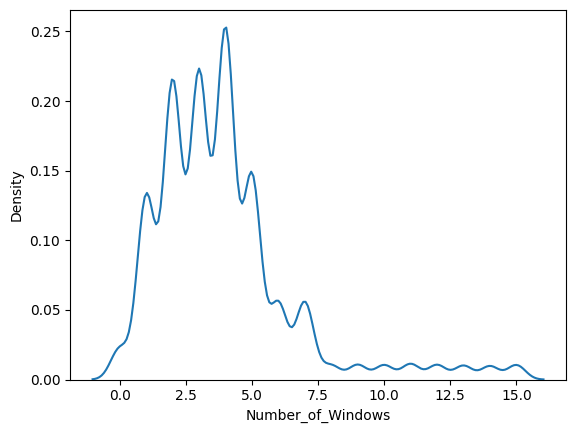

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


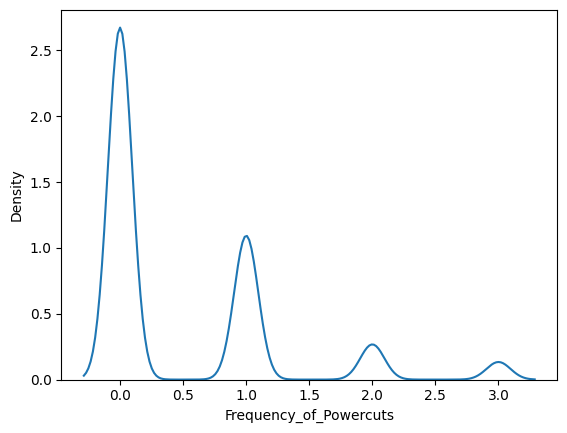

In [376]:
for i in numerical_cols:
    sns.kdeplot(df[i])
    plt.show()

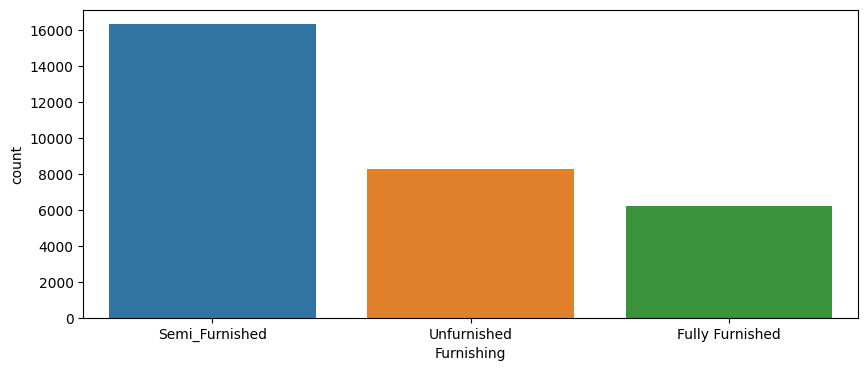

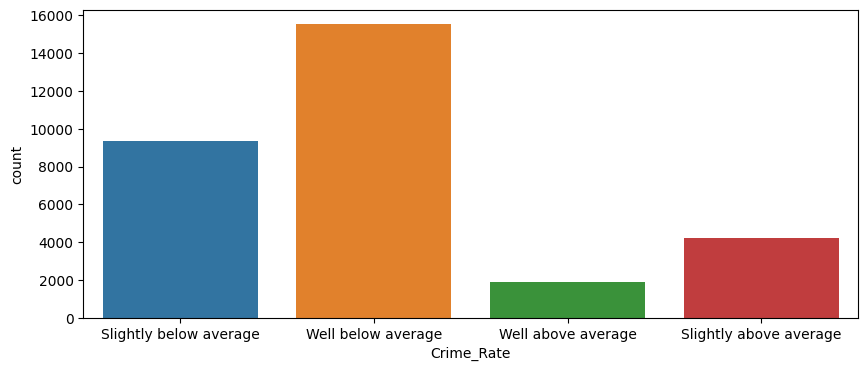

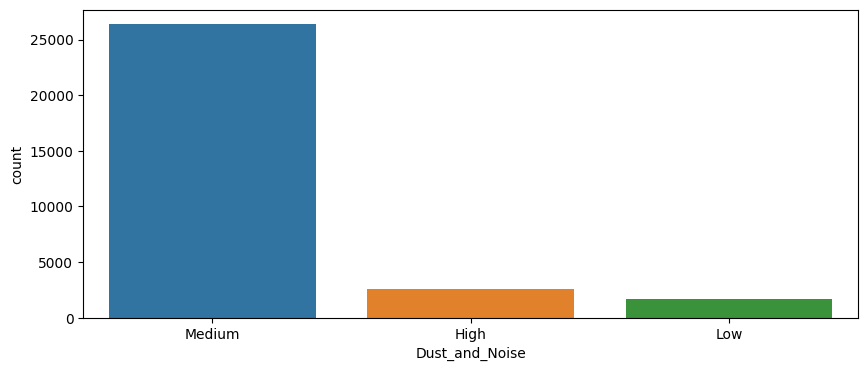

In [377]:

for i in categorical_cols:
    plt.figure(figsize = (10,4))
    sns.countplot( x = df[i])
    plt.show()

In [ ]:
# handel missing values 

In [378]:
# Impute missing values for categorical columns with mode
categorical_cols = [ 'Furnishing', 'Crime_Rate','Dust_and_Noise']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [379]:

# Impute missing values for numerical columns with median
numerical_cols = ['Number_of_Windows', 'Frequency_of_Powercuts']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [380]:
num_cols = [col for col in df.columns if df[col].dtype != "O"]
num_cols

['Property_Area',
 'Number_of_Windows',
 'Number_of_Doors',
 'Frequency_of_Powercuts',
 'Traffic_Density_Score',
 'Air_Quality_Index',
 'Neighborhood_Review',
 'Habitability_score']

# Encoding

In [381]:
odi_encode = ["Furnishing","Crime_Rate", "Dust_and_Noise"]
ohe_encode = ["Property_Type", "Power_Backup","Water_Supply"]    

In [382]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Perform one-hot encoding
ohe_encoder = OneHotEncoder(drop='first')  # Drop first category to avoid multicollinearity
ohe_encoded = ohe_encoder.fit_transform(df[ohe_encode])

# Convert one-hot encoded result to DataFrame
ohe_encoded_df = pd.DataFrame(ohe_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(ohe_encode))

# Perform ordinal encoding
odi_encoder = OrdinalEncoder(categories = [['Unfurnished','Semi_Furnished','Fully Furnished'],
                                   ['Well below average','Slightly below average','Slightly above average','Well above average'],
                                  ['Low','Medium','High']], handle_unknown = 'use_encoded_value', unknown_value = -1)
odi_encoded = odi_encoder.fit_transform(df[odi_encode])
odi_encoded_df = pd.DataFrame(odi_encoded, columns=odi_encode)

# Combine encoded features with original DataFrame
encoded_df = pd.concat([df.drop(columns=ohe_encode + odi_encode), ohe_encoded_df, odi_encoded_df], axis=1)


In [383]:
encode_cat_columns = ['Property_Type_Apartment','Property_Type_Bungalow','Property_Type_Container Home','Property_Type_Duplex',
                      'Property_Type_Single-family home','Power_Backup_No','Power_Backup_Yes','Water_Supply_NOT MENTIONED',
                      'Water_Supply_Once in a day - Evening','Water_Supply_Once in a day - Morning','Water_Supply_Once in two days',
                       'Furnishing', 'Crime_Rate', 'Dust_and_Noise']
encode_cat_columns = encoded_df[encode_cat_columns]
encode_cat_columns

,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31595,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
31596,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
31597,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [384]:
num_columns = encoded_df.drop(columns = encode_cat_columns)
num_columns.iloc[:,:7]

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106,3.926254,1,0.0,5.89,90.0,3.86
1,733,2.000000,2,1.0,4.37,96.0,3.55
2,737,4.000000,2,0.0,7.45,121.0,3.81
3,900,3.000000,2,2.0,6.16,100.0,1.34
4,2238,14.000000,6,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851,4.000000,1,0.0,7.80,149.0,4.72
31595,315,1.000000,1,0.0,5.92,82.0,4.50
31596,480,6.000000,3,0.0,5.68,80.0,3.88
31597,642,1.000000,2,1.0,7.09,162.0,3.76


In [385]:
data = pd.concat([num_columns, encode_cat_columns], axis=1)
data

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,106,3.926254,1,0.0,5.89,90.0,3.86,71.98,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,733,2.000000,2,1.0,4.37,96.0,3.55,71.20,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,737,4.000000,2,0.0,7.45,121.0,3.81,71.39,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
3,900,3.000000,2,2.0,6.16,100.0,1.34,31.46,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
4,2238,14.000000,6,0.0,5.46,116.0,4.77,93.70,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.000000,1,0.0,7.80,149.0,4.72,73.12,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31595,315,1.000000,1,0.0,5.92,82.0,4.50,95.40,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
31596,480,6.000000,3,0.0,5.68,80.0,3.88,81.29,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
31597,642,1.000000,2,1.0,7.09,162.0,3.76,82.80,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [386]:
X = data.drop(columns = 'Habitability_score')
y = data['Habitability_score']

In [387]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,                                                    
                                       test_size = 0.25,
                                       random_state = 42)

In [388]:


Evalution('missing_value_impute', X_train, X_test, y_train, y_test)


,method,train_r2,test_r2,train_adj_r2,test_adj_r2,train_rmse,test_rmse
0,Baseline,0.548385,0.551060,0.547951,0.549765,9.496894,9.518409
0,missing_value_impute,0.582051,0.567993,0.581680,0.566842,9.214095,9.084395


In [389]:
X.isnull().sum()

Property_Area                           0
Number_of_Windows                       0
Number_of_Doors                         0
Frequency_of_Powercuts                  0
Traffic_Density_Score                   0
Air_Quality_Index                       0
Neighborhood_Review                     0
Property_Type_Apartment                 0
Property_Type_Bungalow                  0
Property_Type_Container Home            0
Property_Type_Duplex                    0
Property_Type_Single-family home        0
Power_Backup_No                         0
Power_Backup_Yes                        0
Water_Supply_NOT MENTIONED              0
Water_Supply_Once in a day - Evening    0
Water_Supply_Once in a day - Morning    0
Water_Supply_Once in two days           0
Furnishing                              0
Crime_Rate                              0
Dust_and_Noise                          0
dtype: int64

In [390]:
X = data.drop(columns = 'Habitability_score')
y = data['Habitability_score']

In [391]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,                                                    
                                       test_size = 0.25,
                                       random_state = 42)

In [392]:
num = X_train.iloc[:,:7]
cat = X_train.iloc[:,7:]

In [393]:
scaler = StandardScaler()

# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train.iloc[:,:7])

# Transform test data using the scaler fitted on training data
X_test_scaled = scaler.transform(X_test.iloc[:,:7])

In [394]:
X_test.iloc[:,:7].columns

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review'],
      dtype='object')

In [395]:
scaled_train_columns_df = pd.DataFrame(X_train_scaled, columns=X_train.iloc[:,:7].columns)
scaled_test_columns_df = pd.DataFrame(X_test_scaled, columns=X_test.iloc[:,:7].columns)



In [396]:
scaled_train_columns_df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,0.228584,0.029423,1.424597,-0.660973,-0.939326,-0.041078,0.604245
1,-0.327310,-0.728704,-1.131029,-0.660973,1.235274,0.537025,-1.903413
2,0.230109,-0.728704,0.572722,-0.660973,0.353902,0.633376,1.228041
3,-0.483956,-0.728704,-0.279154,-0.660973,-0.206222,0.392499,1.252993
4,-0.460561,-1.486831,-0.279154,-0.660973,1.078769,-0.217721,0.516914
...,...,...,...,...,...,...,...
23694,0.287072,0.029423,-1.131029,-0.660973,-0.618078,-0.410422,1.340324
23695,-0.299845,-1.107767,0.572722,-0.660973,0.601016,-0.314071,-0.244116
23696,-0.252038,-0.728704,0.572722,0.682068,1.029346,-0.314071,0.529390
23697,0.410660,0.408487,-0.279154,-0.660973,0.263294,-0.442539,-1.017623


In [397]:
X_train.iloc[:,7:].reset_index()

,index,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,29126,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,13484,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0
2,4201,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
3,4191,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
4,7978,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,29802,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
23695,5390,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
23696,860,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23697,15795,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0


In [398]:
data_train_scale = pd.concat([scaled_train_columns_df, X_train.iloc[:,7:].reset_index(drop=True)], axis=1)
data_test_scale = pd.concat([scaled_test_columns_df, X_test.iloc[:,7:].reset_index(drop=True)], axis=1)

In [399]:
data_train_scale

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,0.228584,0.029423,1.424597,-0.660973,-0.939326,-0.041078,0.604245,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.327310,-0.728704,-1.131029,-0.660973,1.235274,0.537025,-1.903413,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0
2,0.230109,-0.728704,0.572722,-0.660973,0.353902,0.633376,1.228041,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
3,-0.483956,-0.728704,-0.279154,-0.660973,-0.206222,0.392499,1.252993,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
4,-0.460561,-1.486831,-0.279154,-0.660973,1.078769,-0.217721,0.516914,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,0.287072,0.029423,-1.131029,-0.660973,-0.618078,-0.410422,1.340324,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
23695,-0.299845,-1.107767,0.572722,-0.660973,0.601016,-0.314071,-0.244116,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
23696,-0.252038,-0.728704,0.572722,0.682068,1.029346,-0.314071,0.529390,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23697,0.410660,0.408487,-0.279154,-0.660973,0.263294,-0.442539,-1.017623,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0


In [400]:
Evalution('missing_value_impute and scaling', data_train_scale, data_test_scale, y_train, y_test)


,method,train_r2,test_r2,train_adj_r2,test_adj_r2,train_rmse,test_rmse
0,Baseline,0.548385,0.551060,0.547951,0.549765,9.496894,9.518409
0,missing_value_impute,0.582051,0.567993,0.581680,0.566842,9.214095,9.084395
0,missing_value_impute and scaling,0.582051,-7.193685,0.581680,-7.215526,9.214095,39.563103


# Previous method + log of y

In [401]:

Evalution('missing_value_impute and log of y', X_train, X_test, np.log(y_train), np.log(y_test))


,method,train_r2,test_r2,train_adj_r2,test_adj_r2,train_rmse,test_rmse
0,Baseline,0.548385,0.551060,0.547951,0.549765,9.496894,9.518409
0,missing_value_impute,0.582051,0.567993,0.581680,0.566842,9.214095,9.084395
0,missing_value_impute and scaling,0.582051,-7.193685,0.581680,-7.215526,9.214095,39.563103
0,missing_value_impute and log of y,0.545103,0.529153,0.544699,0.527898,0.172146,0.168190


# Outliers Handle


In [402]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

In [403]:

def z_score(df, col):
    mean = df[col].mean()
    std = df[col].std()

    ll = (-3 * std) + mean
    ul = (3 * std) + mean

    mask = (df[col] < ll) | (df[col] > ul)
    temp = df[mask]

    if len(temp)>0:
        print(f"Method: Zscore Detection")
        print(f"Column: {col}")
        print(f"Lower bound: {round(ll, 2)}")
        print(f"Upper bound: {round(ul, 2)}")
        print(f"number of outliers in {col}: {len(temp)}")
        print(f"percentage of outliers: {round(len(temp) / len(df) * 100, 2)} %")
        print("---------------------------------------------\n")

    return [len(temp), temp]


def iqr_limit(df, col):

    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    uw = q3 + 1.5 * iqr
    lw = q1 - 1.5 * iqr

    mask = (df[col] > uw) | (df[col] < lw)
    temp = df[mask]

    if len(temp)>0:
            print(f"Method: IQR Detection")
            print(f"Column: {col}")
            print(f"Lower Whiskers: {round(lw, 2)}")
            print(f"Upper Whiskers: {round(uw, 2)}")
            print(f"Number of Outliers in {col}: {len(temp)}")
            print(f"Percentage of Outliers in {col}: {round((len(temp) / len(df) * 100), 2)}%")
            print("---------------------------------------------\n")

    return [len(temp), temp]

def find_outliers(df, col, method="z_score"):
    if method == "z_score":
        return z_score(df, col)
    else:
        return iqr_limit(df, col)

def detect_outliers(df):
    df = df.select_dtypes(exclude = "object")
    z_score_cols = []
    iqr_cols = []
    for col in df:
        skewness = df[col].skew()
        if -0.5 <= skewness <= 0.5:
            method = "z_score"
        else:
            method = "IQR"

        num_outlier = find_outliers(df, col, method)[0]
        if num_outlier:
            if method == "z_score":
                z_score_cols.append(col)
            else:
                iqr_cols.append(col)
    return z_score_cols,iqr_cols

In [404]:
detect_outliers(num_columns)

Method: IQR Detection
Column: Property_Area
Lower Whiskers: -1413.0
Upper Whiskers: 3675.0
Number of Outliers in Property_Area: 1372
Percentage of Outliers in Property_Area: 4.34%
---------------------------------------------

Method: IQR Detection
Column: Number_of_Windows
Lower Whiskers: -2.5
Upper Whiskers: 9.5
Number of Outliers in Number_of_Windows: 1602
Percentage of Outliers in Number_of_Windows: 5.07%
---------------------------------------------

Method: IQR Detection
Column: Frequency_of_Powercuts
Lower Whiskers: -1.5
Upper Whiskers: 2.5
Number of Outliers in Frequency_of_Powercuts: 977
Percentage of Outliers in Frequency_of_Powercuts: 3.09%
---------------------------------------------

Method: IQR Detection
Column: Traffic_Density_Score
Lower Whiskers: 3.2
Upper Whiskers: 9.63
Number of Outliers in Traffic_Density_Score: 447
Percentage of Outliers in Traffic_Density_Score: 1.41%
---------------------------------------------

Method: IQR Detection
Column: Air_Quality_Index
L

([],
 ['Property_Area',
  'Number_of_Windows',
  'Frequency_of_Powercuts',
  'Traffic_Density_Score',
  'Air_Quality_Index',
  'Neighborhood_Review',
  'Habitability_score'])

In [405]:
detect_outliers(np.log(num_columns))

Method: Zscore Detection
Column: Property_Area
Lower bound: 4.2
Upper bound: 9.45
number of outliers in Property_Area: 269
percentage of outliers: 0.85 %
---------------------------------------------

Method: IQR Detection
Column: Number_of_Windows
Lower Whiskers: -0.68
Upper Whiskers: 2.98
Number of Outliers in Number_of_Windows: 571
Percentage of Outliers in Number_of_Windows: 1.81%
---------------------------------------------

Method: IQR Detection
Column: Traffic_Density_Score
Lower Whiskers: 1.35
Upper Whiskers: 2.36
Number of Outliers in Traffic_Density_Score: 1025
Percentage of Outliers in Traffic_Density_Score: 3.24%
---------------------------------------------

Method: IQR Detection
Column: Air_Quality_Index
Lower Whiskers: 3.97
Upper Whiskers: 5.52
Number of Outliers in Air_Quality_Index: 960
Percentage of Outliers in Air_Quality_Index: 3.04%
---------------------------------------------

Method: IQR Detection
Column: Neighborhood_Review
Lower Whiskers: 0.76
Upper Whiskers:

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\

(['Property_Area'],
 ['Number_of_Windows',
  'Traffic_Density_Score',
  'Air_Quality_Index',
  'Neighborhood_Review',
  'Habitability_score'])

In [406]:
# after log transformation only 2 columns outliers are reduaced , so we only transform 2 columns 

outliers_col = ['Property_Area','Number_of_Windows']

In [407]:
X_train[outliers_col] = np.log(X_train[outliers_col] +0.0000001)
X_test[outliers_col] = np.log(X_test[outliers_col]  +0.0000001)

In [408]:
model = LinearRegression()
model.fit(X_train,y_train)
    
# predict
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

In [409]:
Evalution('2 col outliers_handle & impute', X_train, X_test, y_train, y_test)


,method,train_r2,test_r2,train_adj_r2,test_adj_r2,train_rmse,test_rmse
0,Baseline,0.548385,0.551060,0.547951,0.549765,9.496894,9.518409
0,missing_value_impute,0.582051,0.567993,0.581680,0.566842,9.214095,9.084395
0,missing_value_impute and scaling,0.582051,-7.193685,0.581680,-7.215526,9.214095,39.563103
0,missing_value_impute and log of y,0.545103,0.529153,0.544699,0.527898,0.172146,0.168190
0,2 col outliers_handle & impute,0.583720,0.569995,0.583351,0.568849,9.195676,9.063319


# 'yeo-johnson method to handel the outliers


In [410]:
data

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,106,3.926254,1,0.0,5.89,90.0,3.86,71.98,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,733,2.000000,2,1.0,4.37,96.0,3.55,71.20,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,737,4.000000,2,0.0,7.45,121.0,3.81,71.39,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
3,900,3.000000,2,2.0,6.16,100.0,1.34,31.46,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
4,2238,14.000000,6,0.0,5.46,116.0,4.77,93.70,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.000000,1,0.0,7.80,149.0,4.72,73.12,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31595,315,1.000000,1,0.0,5.92,82.0,4.50,95.40,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
31596,480,6.000000,3,0.0,5.68,80.0,3.88,81.29,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
31597,642,1.000000,2,1.0,7.09,162.0,3.76,82.80,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [411]:
X = data.drop(columns = 'Habitability_score')
y = data['Habitability_score']

In [412]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,                                                    
                                       test_size = 0.25,
                                       random_state = 42)

In [413]:
X_test.iloc[:,:7]

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
17935,277,1.000000,3,2.0,7.16,125.0,3.50
17344,253,2.000000,2,3.0,7.16,88.0,2.92
12296,450,1.000000,1,0.0,8.42,169.0,2.43
12491,876,6.000000,1,0.0,7.66,151.0,4.72
6112,235,1.000000,3,0.0,7.18,169.0,3.75
...,...,...,...,...,...,...,...
22914,683,2.000000,2,0.0,5.61,110.0,3.21
26671,1439,2.000000,2,0.0,8.27,179.0,2.42
8085,660,1.000000,1,0.0,8.13,121.0,3.43
6656,1830,2.000000,3,2.0,6.37,148.0,3.47


In [414]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X_train_ = pt.fit_transform(X_train.iloc[:,:7])
X_test_ = pt.transform(X_test.iloc[:,:7])

In [415]:
train_columns_df = pd.DataFrame(X_train_, columns=X_train.iloc[:,:7].columns)
test_columns_df = pd.DataFrame(X_test_, columns=X_test.iloc[:,:7].columns)



In [416]:
data_train = pd.concat([train_columns_df, X_train.iloc[:,7:].reset_index(drop=True)], axis=1)
data_test = pd.concat([test_columns_df, X_test.iloc[:,7:].reset_index(drop=True)], axis=1)

In [417]:
Evalution('impute outlier_handel yeo jhonson', data_train, data_test, y_train,y_test)

,method,train_r2,test_r2,train_adj_r2,test_adj_r2,train_rmse,test_rmse
0,Baseline,0.548385,0.551060,0.547951,0.549765,9.496894,9.518409
0,missing_value_impute,0.582051,0.567993,0.581680,0.566842,9.214095,9.084395
0,missing_value_impute and scaling,0.582051,-7.193685,0.581680,-7.215526,9.214095,39.563103
0,missing_value_impute and log of y,0.545103,0.529153,0.544699,0.527898,0.172146,0.168190
0,2 col outliers_handle & impute,0.583720,0.569995,0.583351,0.568849,9.195676,9.063319
0,impute outlier_handel yeo jhonson,0.582051,-7.246991,0.581680,-7.268974,9.214095,39.691587


#### Highest r2 score that achived is 0.583720 in train and 0.569995 in test	
#### with the method of (3 col outliers_handle & impute imoute missing values)
#### so finally we will choose this method to train the model

In [ ]:
# apply best method on Test Data

In [418]:
# read data
test_df = pd.read_csv("test.csv")
test_df

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6808,Single-family home,1521,5.0,1,Unfurnished,0.0,No,All time,7.61,Well below average,Medium,156.0,4.71
1,0x6a98,Single-family home,2233,2.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50
2,0xacc0,Apartment,986,1.0,1,Unfurnished,0.0,No,All time,7.72,Well below average,Medium,91.0,4.79
3,0x8225,Single-family home,1625,2.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09
4,0xaee8,Single-family home,1166,2.0,2,Fully Furnished,0.0,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,Single-family home,1120,3.0,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56
7896,0xa013,Apartment,445,1.0,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93
7897,0x9721,Bungalow,3780,6.0,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80
7898,0x7e25,Single-family home,1266,3.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25


In [419]:
test_df.drop(columns = ["Id"], inplace  = True)

In [420]:
# Impute missing values for categorical columns with mode
categorical_cols = [ 'Furnishing', 'Crime_Rate','Dust_and_Noise']
test_df[categorical_cols] = test_df[categorical_cols].fillna(test_df[categorical_cols].mode().iloc[0])


In [421]:

# Impute missing values for numerical columns with median
numerical_cols = ['Number_of_Windows', 'Frequency_of_Powercuts']
test_df[numerical_cols] = test_df[numerical_cols].fillna(test_df[numerical_cols].mean())

In [422]:
odi_encode = ["Furnishing","Crime_Rate", "Dust_and_Noise"]

In [423]:
ohe_encode = ["Property_Type", "Power_Backup","Water_Supply"]    

In [424]:
# Perform one-hot encoding on the test dataset
ohe_encoded_test = ohe_encoder.transform(test_df[ohe_encode])
ohe_encoded_test_df = pd.DataFrame(ohe_encoded_test.toarray(), columns=ohe_encoder.get_feature_names_out(ohe_encode))

# Perform ordinal encoding on the test dataset
odi_encoded_test = odi_encoder.transform(test_df[odi_encode])
odi_encoded_test_df = pd.DataFrame(odi_encoded_test, columns=odi_encode)

# Combine encoded features with original test DataFrame
encoded_test_df = pd.concat([test_df.drop(columns=ohe_encode + odi_encode), ohe_encoded_test_df, odi_encoded_test_df], axis=1)


In [425]:
encoded_test_df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,1521,5.0,1,0.0,7.61,156.0,4.71,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2233,2.0,1,0.0,5.28,82.0,4.50,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,986,1.0,1,0.0,7.72,91.0,4.79,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1625,2.0,1,0.0,6.19,159.0,4.09,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1166,2.0,2,0.0,5.84,82.0,3.56,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
7896,445,1.0,3,1.0,5.70,86.0,2.93,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0


In [426]:
cat_cols = encoded_test_df.iloc[:,7:]
cat_cols

,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
7896,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
7897,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7898,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0


In [427]:
num_cols = encoded_test_df.iloc[:,:7]
num_cols

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,1521,5.0,1,0.0,7.61,156.0,4.71
1,2233,2.0,1,0.0,5.28,82.0,4.50
2,986,1.0,1,0.0,7.72,91.0,4.79
3,1625,2.0,1,0.0,6.19,159.0,4.09
4,1166,2.0,2,0.0,5.84,82.0,3.56
...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56
7896,445,1.0,3,1.0,5.70,86.0,2.93
7897,3780,6.0,6,0.0,6.84,137.0,3.80
7898,1266,3.0,1,0.0,4.60,88.0,3.25


In [428]:
encoded_data = pd.concat([num_cols, cat_cols], axis=1)
encoded_data

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,1521,5.0,1,0.0,7.61,156.0,4.71,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2233,2.0,1,0.0,5.28,82.0,4.50,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,986,1.0,1,0.0,7.72,91.0,4.79,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1625,2.0,1,0.0,6.19,159.0,4.09,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1166,2.0,2,0.0,5.84,82.0,3.56,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
7896,445,1.0,3,1.0,5.70,86.0,2.93,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0


In [429]:
# after log transformation only 2 columns oulier reduace so we only transform 2 columns 

outliers_col = ['Property_Area','Number_of_Windows']

In [430]:
encoded_data[outliers_col]

,Property_Area,Number_of_Windows
0,1521,5.0
1,2233,2.0
2,986,1.0
3,1625,2.0
4,1166,2.0
...,...,...
7895,1120,3.0
7896,445,1.0
7897,3780,6.0
7898,1266,3.0


In [431]:
encoded_data[outliers_col] = np.log(encoded_data[outliers_col] +0.0000001)


In [432]:
encoded_data

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,...,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Furnishing,Crime_Rate,Dust_and_Noise
0,7.327123,1.609438e+00,1,0.0,7.61,156.0,4.71,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.711101,6.931472e-01,1,0.0,5.28,82.0,4.50,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,6.893656,1.000000e-07,1,0.0,7.72,91.0,4.79,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.393263,6.931472e-01,1,0.0,6.19,159.0,4.09,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,7.061334,6.931472e-01,2,0.0,5.84,82.0,3.56,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,7.021084,1.098612e+00,2,0.0,5.55,80.0,3.56,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
7896,6.098074,1.000000e-07,3,1.0,5.70,86.0,2.93,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
7897,8.237479,1.791759e+00,6,0.0,6.84,137.0,3.80,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7898,7.143618,1.098612e+00,1,0.0,4.60,88.0,3.25,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0


In [433]:
y_pred_test = model.predict(encoded_data)

In [434]:
pd.read_csv('sample_submission.csv')

,Id,Habitability_score
0,0x6808,93.67
1,0x6a98,60.78
2,0xacc0,52.04
3,0x8225,82.43
4,0xaee8,28.23
...,...,...
7895,0x6e26,28.84
7896,0xa013,88.77
7897,0x9721,60.40
7898,0x7e25,32.57


In [437]:
submission = pd.DataFrame({
    'Id': test_df['Id'],  
    'Habitability_score': y_pred_test
})

# Save the DataFrame to a CSV file without including the index
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

In [436]:
# read data
test_df = pd.read_csv("test.csv")
test_df.head()


,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6808,Single-family home,1521,5.0,1,Unfurnished,0.0,No,All time,7.61,Well below average,Medium,156.0,4.71
1,0x6a98,Single-family home,2233,2.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50
2,0xacc0,Apartment,986,1.0,1,Unfurnished,0.0,No,All time,7.72,Well below average,Medium,91.0,4.79
3,0x8225,Single-family home,1625,2.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09
4,0xaee8,Single-family home,1166,2.0,2,Fully Furnished,0.0,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56
